In [2]:
import pandas as pd
import numpy as np
import dvc.api
import seaborn as sns
import matplotlib.pyplot as plt
import logging

In [3]:
#Create and configure logger
logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')

In [4]:
#Creating an object
logger=logging.getLogger()

In [5]:
path = ['data/store.csv', 'data/train.csv', 'data/test.csv']
version = ['store_v1', 'train_v1', 'test_v1']

In [6]:
    repo = '/home/michael/Pharmaceutical-Sales-prediction-across-multiple-stores'
    data_url = dvc.api.get_url(
        path = path[0],
        repo = repo,
        rev=version[0]
        )
    data_url2 = dvc.api.get_url(
        path = path[1],
        repo = repo,
        rev=version[1]
        )
    data_url3 = dvc.api.get_url(
        path = path[2],
        repo = repo,
        rev=version[2]
        )

    df_store = pd.read_csv(data_url)
    df_train = pd.read_csv(data_url2)
    df_test = pd.read_csv(data_url3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [12]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [13]:
len(df_train)

1017209

In [14]:
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['WeekOftheYear'] = df_train['Date'].dt.weekofyear

<ipython-input-14-667405014bab>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_train['WeekOftheYear'] = df_train['Date'].dt.weekofyear


In [15]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOftheYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [16]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
WeekOftheYear    0
dtype: int64

In [17]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [18]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [19]:
len(df_store)

1115

In [20]:
# impute the missing value in store data
df_test['Open'].fillna(df_test['Open'].mode, inplace = True)
df_test.isnull().values.any()

False

In [21]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [22]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [23]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [24]:
df_store1 = df_store.copy()

In [25]:
df_store['Promo2SinceWeek'].fillna(df_store['Promo2SinceWeek'].mode, inplace = True)
df_store['Promo2SinceYear'].fillna(df_store['Promo2SinceYear'].mode, inplace = True)
df_store['PromoInterval'].fillna(df_store['PromoInterval'].mode, inplace = True)
df_store.isnull().values.any()

True

In [26]:
# impute the missing values in store data
df_store['CompetitionOpenSinceMonth'].fillna(df_store['CompetitionOpenSinceMonth'].mode, inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(df_store['CompetitionOpenSinceYear'].mode, inplace = True)
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)
df_store.isnull().values.any()

False

In [27]:
store_train = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

In [28]:
store_train.groupby('StoreType')['Customers', 'Sales'].sum()

<ipython-input-28-5222cd9f3be2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_train.groupby('StoreType')['Customers', 'Sales'].sum()


,Customers,Sales
StoreType,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


In [29]:
# Create a Day of Week feature
store_train['day_of_week'] = store_train['Date'].dt.day_name()

In [30]:
store_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'WeekOftheYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'day_of_week'],
      dtype='object')

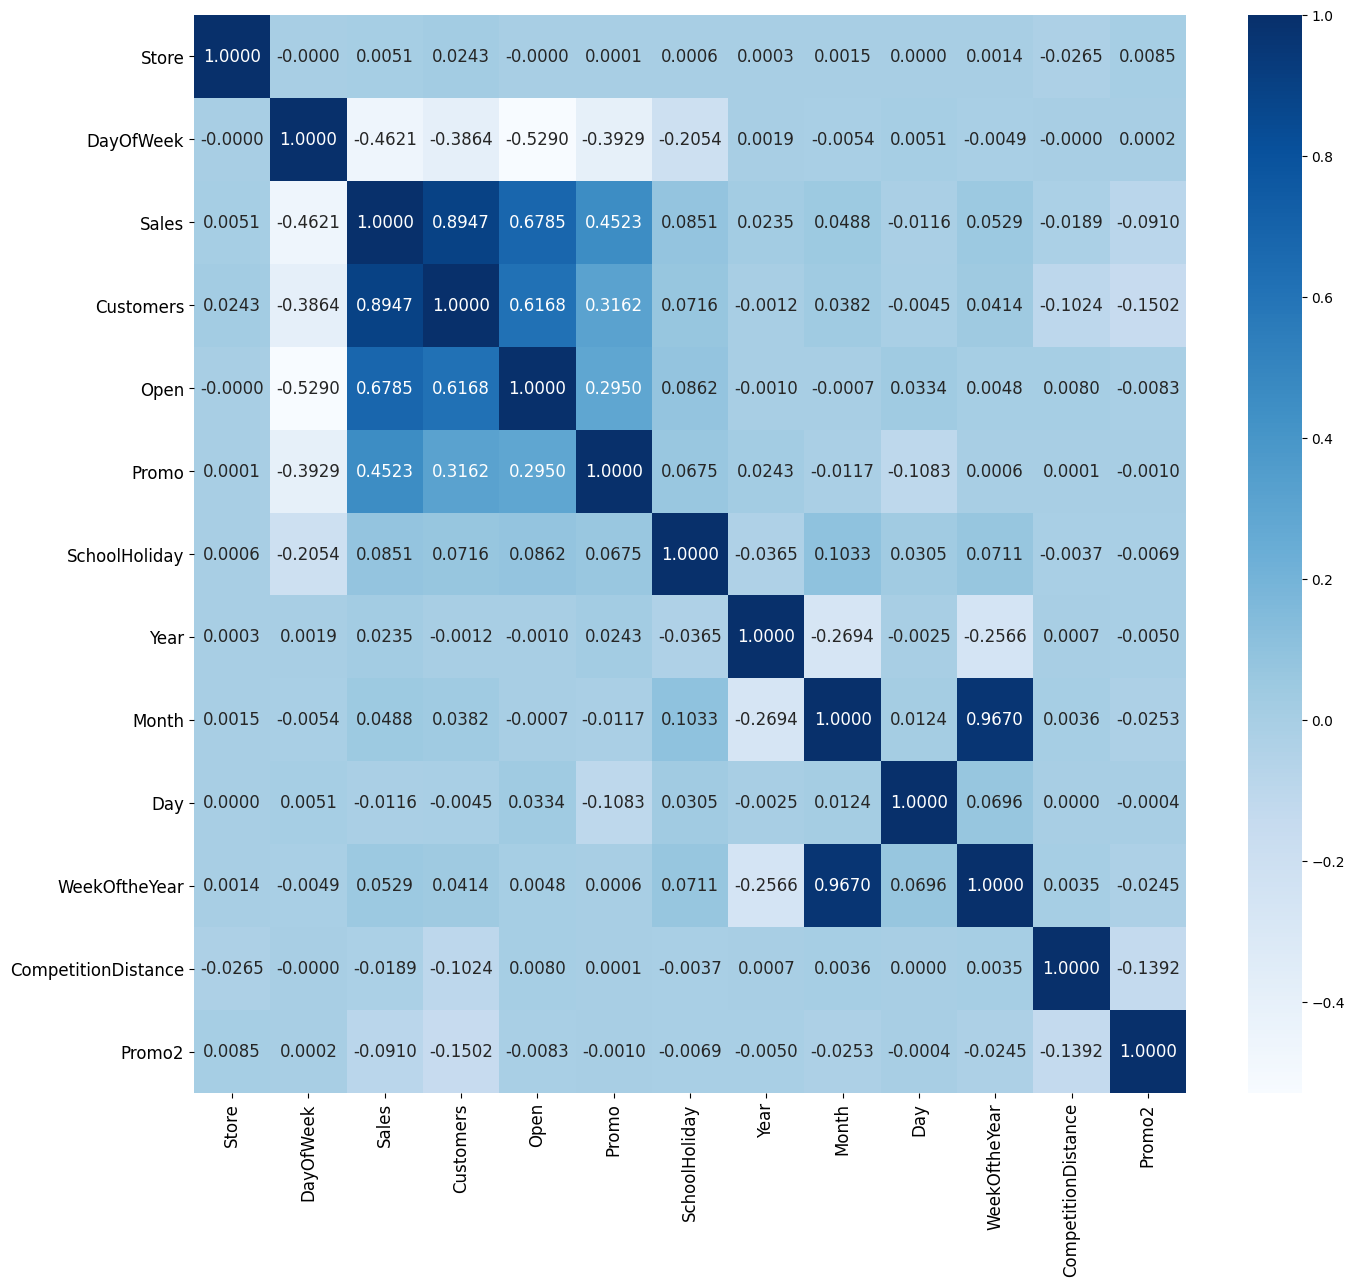

In [31]:
#correlation matrix
corrMatrix= store_train.corr()
f, ax = plt.subplots(figsize=(16, 14))
res=sns.heatmap(corrMatrix,cmap="Blues",annot=True,fmt='.4f',annot_kws={"size":12})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
plt.show()

In [32]:
len(open_gp.Store.value_counts().index.tolist())

NameError: name 'open_gp' is not defined

In [ ]:
len(df_train.Store.value_counts())

In [ ]:
stores = df_train.groupby('Store')

In [ ]:
stores_total = stores['Sales'].sum()

In [ ]:
stores_total.head()

In [ ]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

In [ ]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

In [ ]:
train_store = pd.merge(df_train, df_store, how = 'inner', on = 'Store')

In [34]:
week_day_df = store_train.groupby('day_of_week')

In [1]:
week_day_df['Customers'].value_counts()

NameError: name 'week_day_df' is not defined